# Monocle2  

In [1]:
library(Biobase)
library(knitr)
library(reshape2)
library(ggplot2)
library(HSMMSingleCell)
library(monocle)
data(HSMM_expr_matrix) ## RPKM matrix, 271 cells, 47192 genes
data(HSMM_gene_annotation)
data(HSMM_sample_sheet)
HSMM_expr_matrix[1:10,1:5] 

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite B

,T0_CT_A01,T0_CT_A03,T0_CT_A05,T0_CT_A06,T0_CT_A07
ENSG00000000003.10,21.984400,1.280040,43.461800,0.00000,39.807600
ENSG00000000005.5,0.000000,0.000000,0.000000,0.00000,0.000000
ENSG00000000419.8,40.059700,77.580800,6.496560,4.90934,1.156520
ENSG00000000457.8,0.937081,0.729195,0.000000,0.00000,0.000000
ENSG00000000460.12,0.740922,57.578500,3.935870,0.00000,0.000000
ENSG00000000938.8,0.000000,0.000000,0.000000,0.00000,0.000000
ENSG00000000971.11,3.002980,15.302400,50.804800,4.68513,0.000000
ENSG00000001036.8,128.197000,16.086700,25.320900,10.66480,63.773500
ENSG00000001084.6,7.619720,0.000000,0.000000,0.00000,0.000000
ENSG00000001167.10,13.024900,24.777600,0.681409,1.36587,0.399352


In [2]:
head(HSMM_gene_annotation)

,gene_short_name,biotype,num_cells_expressed,use_for_ordering
,<chr>,<fct>,<int>,<lgl>
ENSG00000000003.10,TSPAN6,protein_coding,231,FALSE
ENSG00000000005.5,TNMD,protein_coding,0,FALSE
ENSG00000000419.8,DPM1,protein_coding,275,FALSE
ENSG00000000457.8,SCYL3,protein_coding,24,FALSE
ENSG00000000460.12,C1orf112,protein_coding,78,TRUE
ENSG00000000938.8,FGR,protein_coding,0,FALSE


In [3]:
head(HSMM_sample_sheet)

,Library,Well,Hours,Media,Mapped.Fragments,Pseudotime,State
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
T0_CT_A01,SCC10013_A01,A01,0,GM,1958074,23.916673,1
T0_CT_A03,SCC10013_A03,A03,0,GM,1930722,9.022265,1
T0_CT_A05,SCC10013_A05,A05,0,GM,1452623,7.546608,1
T0_CT_A06,SCC10013_A06,A06,0,GM,2566325,21.463948,1
T0_CT_A07,SCC10013_A07,A07,0,GM,2383438,11.299806,1
T0_CT_A08,SCC10013_A08,A08,0,GM,1472238,67.436042,2


## CellDataSet
Monocle holds single cell expression data in objects of the CellDataSet class. The class is derived from the Bioconductor ExpressionSet class, which provides a common interface familiar to those who have analyzed microarray experiments with Bioconductor. The class requires three input files:
* __exprs__, a numeric matrix of expression values, where rows are genes, and columns are cells
* __phenoData__, an AnnotatedDataFrame object, where rows are cells, and columns are cell attributes (such as cell type, culture condition, day captured, etc.)
* __featureData__, an AnnotatedDataFrame object, where rows are features (e.g. genes), and columns are gene attributes, such as biotype, gc content, etc.

In [4]:
pd <- new("AnnotatedDataFrame", data = HSMM_sample_sheet)
fd <- new("AnnotatedDataFrame", data = HSMM_gene_annotation)

# First create a CellDataSet from the relative expression levels

## Here is only the reading of the RPKM expression matrix.
HSMM <- newCellDataSet(as.matrix(HSMM_expr_matrix),   
                       phenoData = pd, 
                       featureData = fd,
                       lowerDetectionLimit=0.1,
                       expressionFamily=tobit(Lower=0.1))

# Next, use it to estimate RNA counts
# Converts FPKM/TPM data to transcript counts. 
# This allows for the use for negative binomial as an expressionFamily. 
# These results are often far more accurate than using tobit().
rpc_matrix <- relative2abs(HSMM)
rpc_matrix[1:10,1:5] 

Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:

“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first

“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first

“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "num_genes") {:
“the condition has length > 1 and only the first

,T0_CT_A01,T0_CT_A03,T0_CT_A05,T0_CT_A06,T0_CT_A07
ENSG00000000003.10,1.60309506,0.09929705,2.93679928,0.00000000,2.18692386
ENSG00000000005.5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
ENSG00000000419.8,2.92113986,6.01820615,0.43898533,0.34343867,0.06353614
ENSG00000000457.8,0.06833163,0.05656613,0.00000000,0.00000000,0.00000000
ENSG00000000460.12,0.05402778,4.46655980,0.26595447,0.00000000,0.00000000
ENSG00000000938.8,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
ENSG00000000971.11,0.21897629,1.18705914,3.43298023,0.32775379,0.00000000
ENSG00000001036.8,9.34808217,1.24789995,1.71098300,0.74606865,3.50354678
ENSG00000001084.6,0.55562742,0.00000000,0.00000000,0.00000000,0.00000000
ENSG00000001167.10,0.94977133,1.92208258,0.04604415,0.09555105,0.02193934


In [5]:
## The expression value of the RPKM format needs to be converted to reads counts
## before the downstream analysis can be performed!

# Now, make a new CellDataSet using the RNA counts
HSMM <- newCellDataSet(as(as.matrix(rpc_matrix), "sparseMatrix"),
                       phenoData = pd, 
                       featureData = fd,
                       lowerDetectionLimit=0.5,
                       expressionFamily=negbinomial.size())

## Filter low quality cells and undetected genes

### Gene-based filtering
__Estimate size factors and dispersions__

Finally, we'll also call two functions that pre-calculate some information about the data. Size factors help us normalize for differences in mRNA recovered across cells, and "dispersion" values will help us perform differential expression analysis later.



In [6]:
HSMM <- estimateSizeFactors(HSMM)
HSMM <- estimateDispersions(HSMM)

Removing 139 outliers


__Filtering low-quality cells__

The first step in any single-cell RNA-Seq analysis is identifying poor-quality libraries from further analysis.

In [7]:
HSMM <- detectGenes(HSMM, min_expr = 0.1)
print(head(fData(HSMM)))
# For each gene, check how many cells have expression levels.
# Only those genes with expression levels of at least 10 cells 
# are left for follow-up analysis.
expressed_genes <- row.names(subset(fData(HSMM),
    num_cells_expressed >= 10))
length(expressed_genes) # Only 14224 genes remain

                   gene_short_name        biotype num_cells_expressed
ENSG00000000003.10          TSPAN6 protein_coding                 184
ENSG00000000005.5             TNMD protein_coding                   0
ENSG00000000419.8             DPM1 protein_coding                 211
ENSG00000000457.8            SCYL3 protein_coding                  18
ENSG00000000460.12        C1orf112 protein_coding                  47
ENSG00000000938.8              FGR protein_coding                   0
                   use_for_ordering
ENSG00000000003.10            FALSE
ENSG00000000005.5             FALSE
ENSG00000000419.8             FALSE
ENSG00000000457.8             FALSE
ENSG00000000460.12             TRUE
ENSG00000000938.8             FALSE


[1] 14224

In [8]:
print(head(pData(HSMM))) 


               Library Well Hours Media Mapped.Fragments Pseudotime State
T0_CT_A01 SCC10013_A01  A01     0    GM          1958074  23.916673     1
T0_CT_A03 SCC10013_A03  A03     0    GM          1930722   9.022265     1
T0_CT_A05 SCC10013_A05  A05     0    GM          1452623   7.546608     1
T0_CT_A06 SCC10013_A06  A06     0    GM          2566325  21.463948     1
T0_CT_A07 SCC10013_A07  A07     0    GM          2383438  11.299806     1
T0_CT_A08 SCC10013_A08  A08     0    GM          1472238  67.436042     2
          Size_Factor num_genes_expressed
T0_CT_A01    1.392811                6850
T0_CT_A03    1.311607                6947
T0_CT_A05    1.218922                7019
T0_CT_A06    1.013981                5560
T0_CT_A07    1.085580                5998
T0_CT_A08    1.099878                6055


### Filter based on sample expression


In [9]:
pData(HSMM)$Total_mRNAs <- Matrix::colSums(exprs(HSMM))
HSMM <- HSMM[,pData(HSMM)$Total_mRNAs < 1e6]
upper_bound <- 10^(mean(log10(pData(HSMM)$Total_mRNAs)) +
                     2*sd(log10(pData(HSMM)$Total_mRNAs)))
lower_bound <- 10^(mean(log10(pData(HSMM)$Total_mRNAs)) -
                     2*sd(log10(pData(HSMM)$Total_mRNAs)))
table(pData(HSMM)$Hours)


 0 24 48 72 
69 74 79 49 

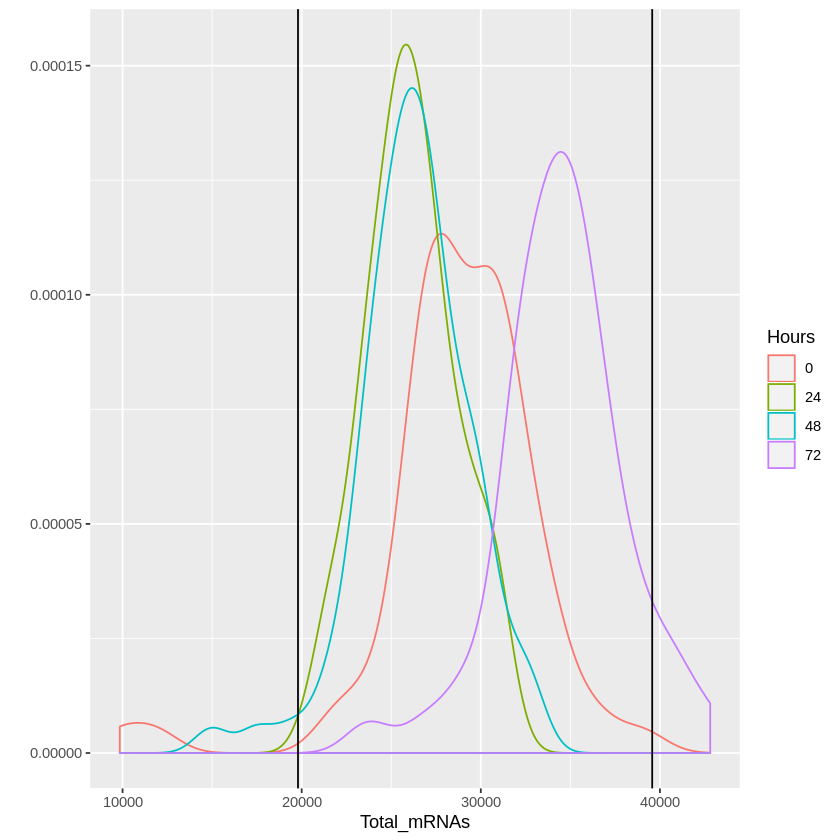

In [10]:
qplot(Total_mRNAs, data = pData(HSMM), color = Hours, geom = "density") +
  geom_vline(xintercept = lower_bound) +
  geom_vline(xintercept = upper_bound)

Warning message:
“Removed 3576038 rows containing non-finite values (stat_density).”

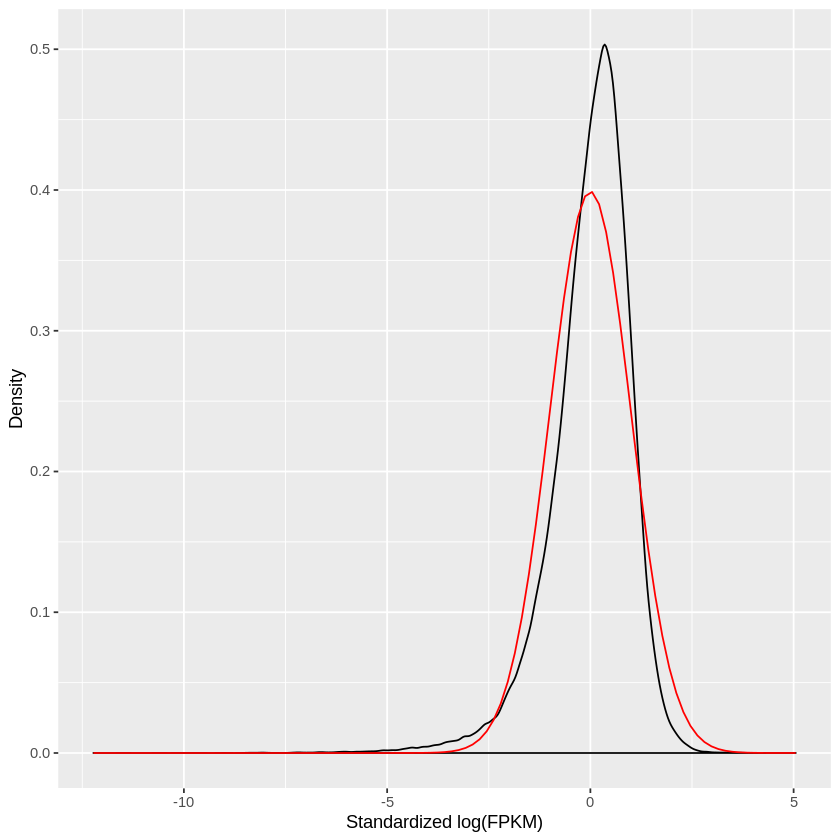

In [11]:
HSMM <- HSMM[,pData(HSMM)$Total_mRNAs > lower_bound &
      pData(HSMM)$Total_mRNAs < upper_bound]
HSMM <- detectGenes(HSMM, min_expr = 0.1)

# Log-transform each value in the expression matrix.
L <- log(exprs(HSMM[expressed_genes,]))

# Standardize each gene, so that they are all on the same scale,
# Then melt the data with plyr so we can plot it easily
melted_dens_df <- melt(Matrix::t(scale(Matrix::t(L))))

# Plot the distribution of the standardized gene expression values.
qplot(value, geom = "density", data = melted_dens_df) +
stat_function(fun = dnorm, size = 0.5, color = 'red') +
xlab("Standardized log(FPKM)") +
ylab("Density")

## Clustering
### Classifying and Counting Cells
The MYF5 gene and the ANPEP gene are used to classify cells to distinguish between Myoblast and Fibroblast.

In [12]:
# Find the ID of the expression matrix based on the gene name, 
# here is the ID of the ENSEMBL database.
MYF5_id <- row.names(subset(fData(HSMM), gene_short_name == "MYF5"))
ANPEP_id <- row.names(subset(fData(HSMM), gene_short_name == "ANPEP"))
# The genes selected here depend on their own single-cell experimental design.
cth <- newCellTypeHierarchy()

cth <- addCellType(cth, "Myoblast", classify_func = function(x) { x[MYF5_id,] >= 1 })
cth <- addCellType(cth, "Fibroblast", classify_func = function(x)
{ x[MYF5_id,] < 1 & x[ANPEP_id,] > 1 })

HSMM <- classifyCells(HSMM, cth, 0.1)




In [13]:
# This time the HSMM has been changed, adding properties.
table(pData(HSMM)$CellType)


Fibroblast   Myoblast    Unknown 
        56         85        121 

It can be seen that a large part of cells are simply not categorized according to the expression levels of these two genes. This is normal because the mRNA capture rate in single-cell transcriptome sequencing is not good enough. This step successfully adds an attribute to the HSMM S4 object, which is the CellType, which will be used in the analysis below.

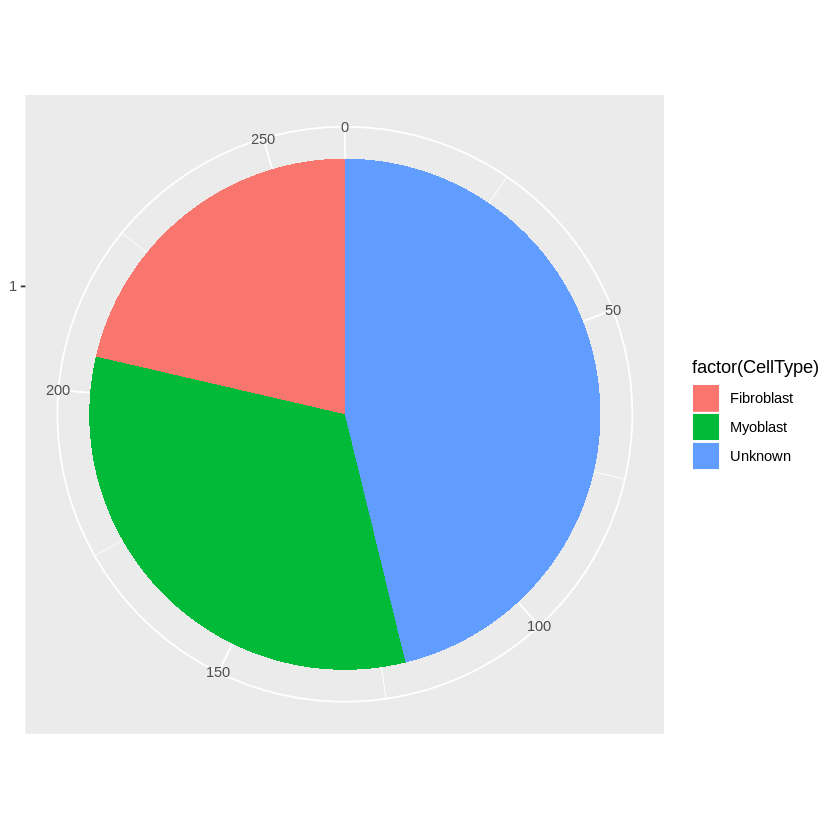

In [14]:
pie <- ggplot(pData(HSMM), aes(x = factor(1), fill = factor(CellType))) +
  geom_bar(width = 1)
pie + coord_polar(theta = "y") +
  theme(axis.title.x = element_blank(), axis.title.y = element_blank())

### Unsupervised clustering

In [15]:
disp_table <- dispersionTable(HSMM)
head(disp_table)


gene_id,mean_expression,dispersion_fit,dispersion_empirical
<fct>,<dbl>,<dbl>,<dbl>
ENSG00000000003.10,1.80534418,1.249323,1.215666
ENSG00000000419.8,2.17342979,1.099130,1.008759
ENSG00000000457.8,0.02518587,63.932303,23.177101
ENSG00000000460.12,0.15331486,10.805439,17.941440
ENSG00000000971.11,2.45231977,1.015354,1.287973
ENSG00000001036.8,1.04484075,1.894827,1.540376


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

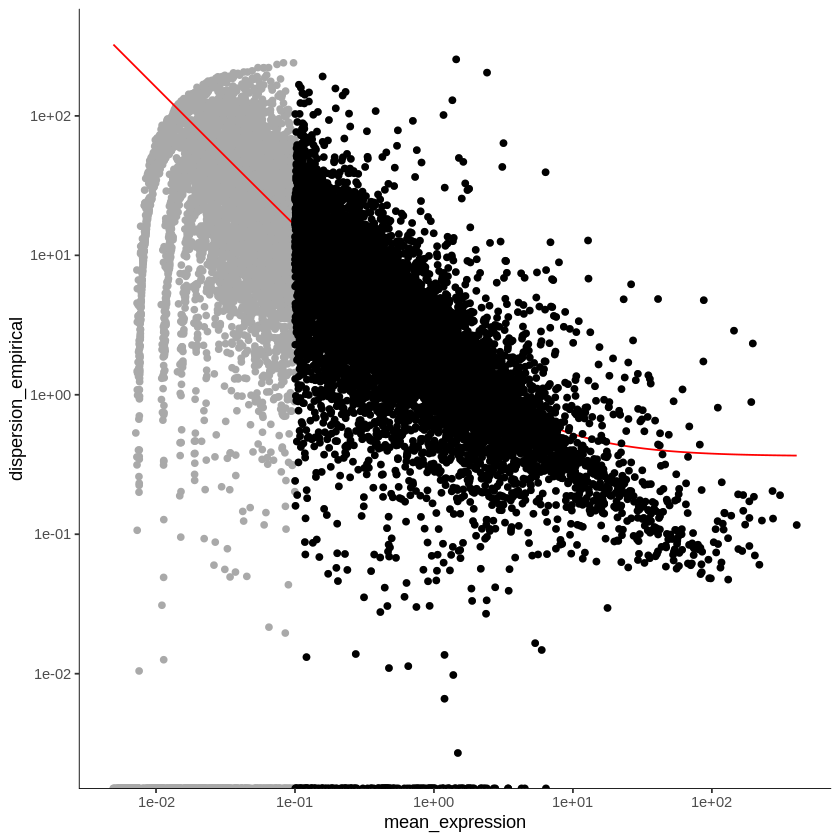

In [16]:
# Only 10198 genes that meet the conditions can enter the cluster analysis.
unsup_clustering_genes <- subset(disp_table, mean_expression >= 0.1)
HSMM <- setOrderingFilter(HSMM, unsup_clustering_genes$gene_id)
plot_ordering_genes(HSMM)

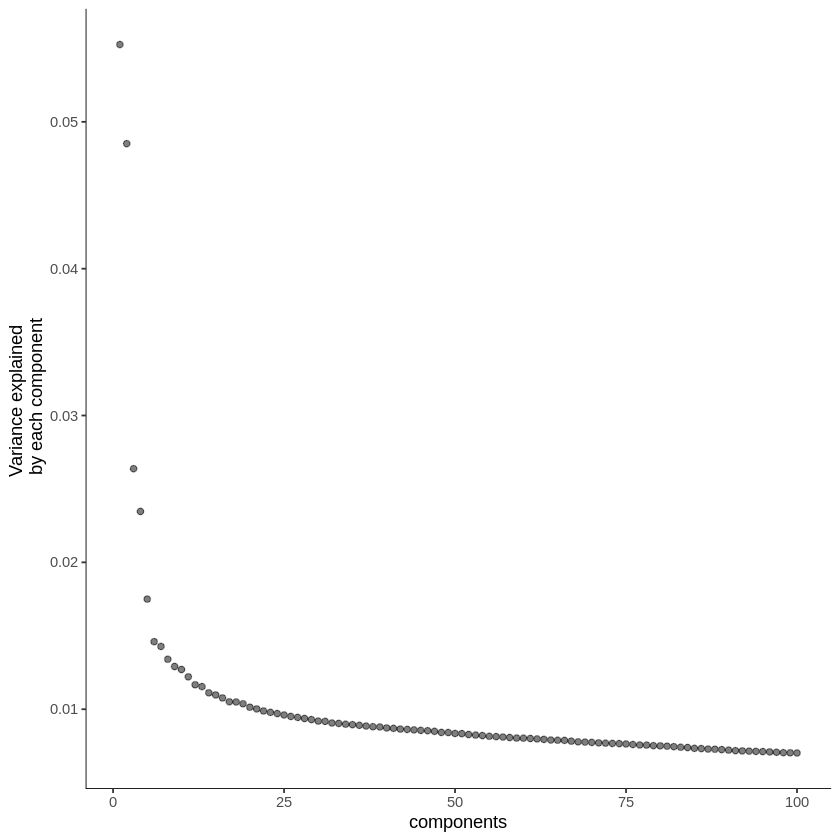

In [17]:
# Here, look at the relationship between gene expression and gene variability.
# The genes in the shaded area of gray will be discarded and will 
# not enter the cluster analysis.
plot_pc_variance_explained(HSMM, return_all = F) # norm_method = 'log'


Remove noise by PCA ...
Reduce dimension by tSNE ...


Distance cutoff calculated to 1.140524 


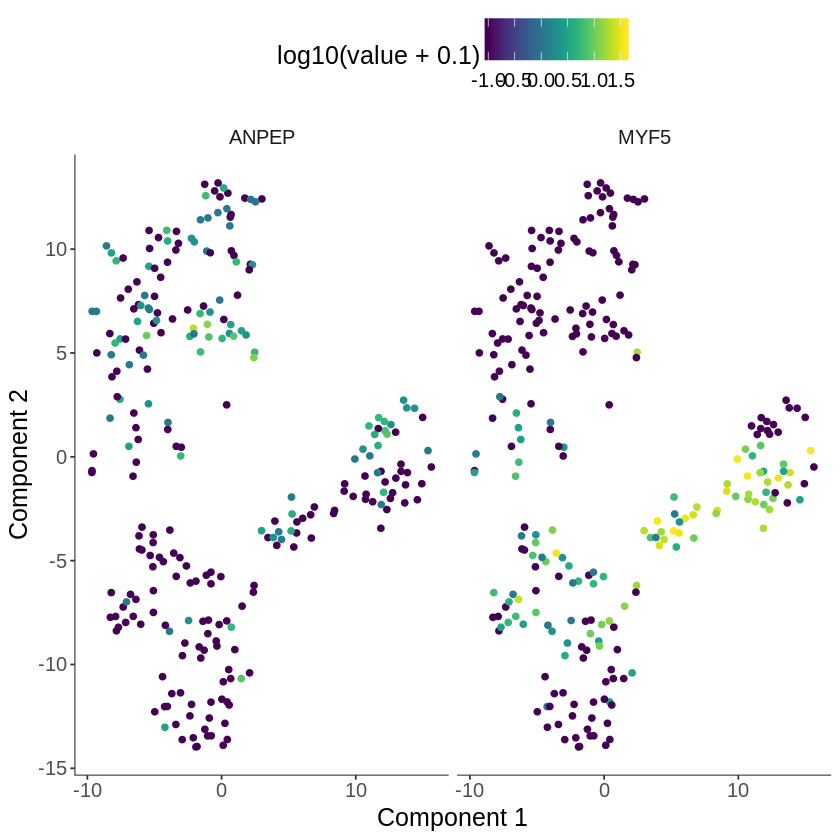

In [18]:
# t-SNE clustering
HSMM <- reduceDimension(HSMM, max_components=2, num_dim = 6, 
                        reduction_method = 'tSNE', verbose = T) 
HSMM <- clusterCells(HSMM, num_clusters=2)

plot_cell_clusters(HSMM, 1, 2, color="CellType", markers=c("MYF5", "ANPEP"))

 Unfortunately, in this experiment, the cells don't simply cluster by type - there's not a clear space between the green cells and the red cells. This isn't all that surprising, because myoblasts and contaminating interstitial fibroblasts express many of the same genes in these culture conditions, and there are multiple culture conditions in the experiment.

In [19]:
head(pData(HSMM))

,Library,Well,Hours,Media,Mapped.Fragments,Pseudotime,State,Size_Factor,num_genes_expressed,Total_mRNAs,CellType,Cluster,peaks,halo,delta,rho,nearest_higher_density_neighbor
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>
T0_CT_A01,SCC10013_A01,A01,0,GM,1958074,23.916673,1,1.392811,6850,39080,Myoblast,1,FALSE,FALSE,0.8171660,1.820333,NA
T0_CT_A03,SCC10013_A03,A03,0,GM,1930722,9.022265,1,1.311607,6947,36720,Myoblast,1,FALSE,FALSE,0.4798402,4.659871,NA
T0_CT_A05,SCC10013_A05,A05,0,GM,1452623,7.546608,1,1.218922,7019,34112,Myoblast,1,FALSE,FALSE,0.3188517,6.056755,NA
T0_CT_A06,SCC10013_A06,A06,0,GM,2566325,21.463948,1,1.013981,5560,28384,Myoblast,1,FALSE,FALSE,0.4660764,2.356635,NA
T0_CT_A07,SCC10013_A07,A07,0,GM,2383438,11.299806,1,1.085580,5998,30360,Myoblast,1,FALSE,FALSE,1.0068539,1.536984,NA
T0_CT_A08,SCC10013_A08,A08,0,GM,1472238,67.436042,2,1.099878,6055,30808,Unknown,1,FALSE,FALSE,1.0842480,3.543269,NA


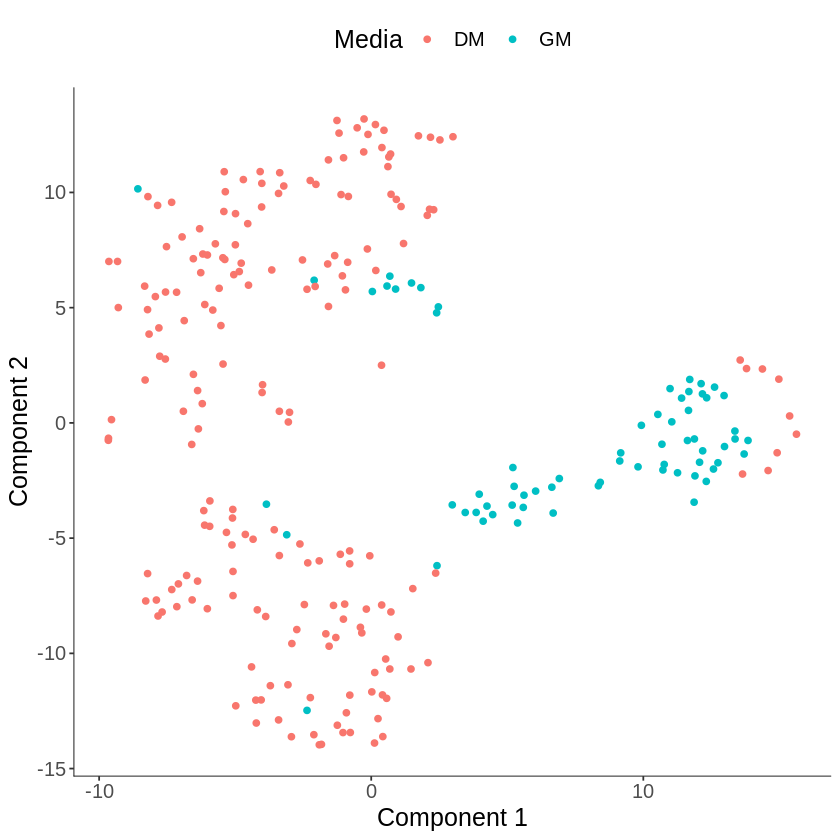

In [20]:
plot_cell_clusters(HSMM, 1, 2, color = "Media")

Removing batch effects
Remove noise by PCA ...
Reduce dimension by tSNE ...


Distance cutoff calculated to 0.9870369 


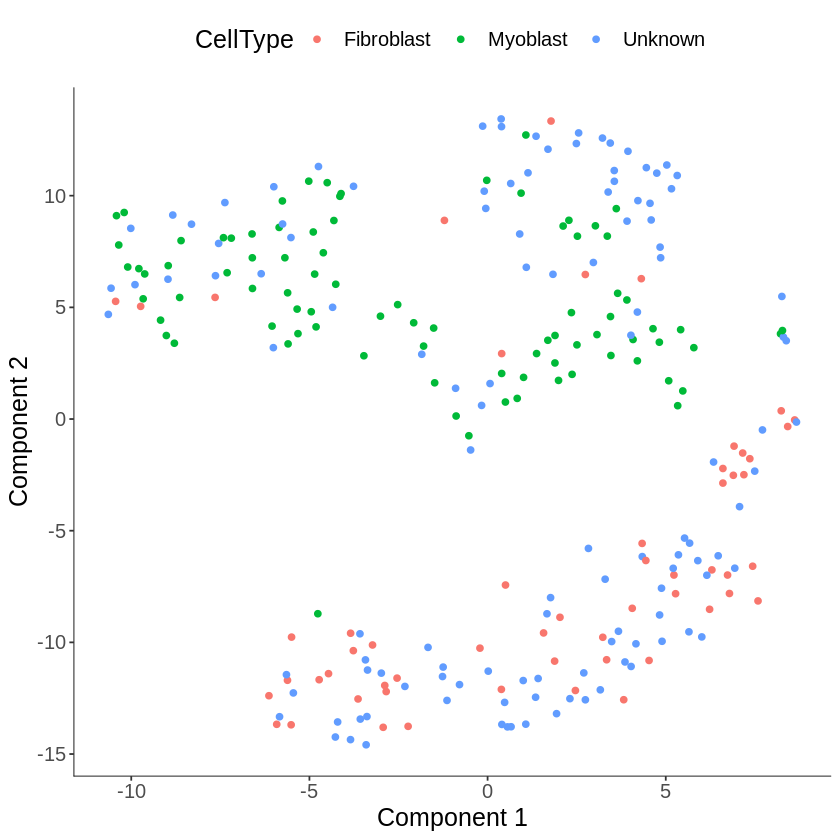

In [21]:
HSMM <- reduceDimension(HSMM, max_components = 2, num_dim = 2,
            reduction_method = 'tSNE',
            residualModelFormulaStr = "~Media + num_genes_expressed",
            verbose = T)
HSMM <- clusterCells(HSMM, num_clusters = 2)
plot_cell_clusters(HSMM, 1, 2, color = "CellType")



## Pseudotime: constructing single cell trajectories

<table><tr><td bgcolor=orange>


### __What is__ _pseudotime?_

</td></tr></table>

__Pseudotime is a measure of how much progress an individual cell has made through a process such as cell differentiation.__ In many biological processes, cells do not progress in perfect synchrony. In single-cell expression studies of processes such as cell differentiation, captured cells might be widely distributed in terms of progress. That is, in a population of cells captured at exactly the same time, some cells might be far along, while others might not yet even have begun the process. This asynchrony creates major problems when you want to understand the sequence of regulatory changes that occur as cells transition from one state to the next. Tracking the expression across cells captured at the same time produces a very compressed sense of a gene's kinetics, and the apparent variability of that gene's expression will be very high. By ordering each cell according to its progress along a learned trajectory, Monocle alleviates the problems that arise due to asynchrony. __Instead of tracking changes in expression as a function of time, Monocle tracks changes as a function of progress along the trajectory, which we term 'pseudotime'.__ Pseudotime is an abstract unit of progress: it's simply the distance between a cell and the start of the trajectory, measured along the shortest path. The trajectory's total length is defined in terms of the total amount of transcriptional change that a cell undergoes as it moves from the starting state to the end state.



In most biological processes, the participating cells usually do not develop synchronously. Only single-cell transcriptome technology can separate the cells in the intermediate state of the process, and the pseudotime analysis method in the monocle package is to explore These ones.

### The ordering workflow

- __Choose genes that define a cell’s progress__

 * Ordering based on genes that differ between clusters
 * Selecting genes with high dispersion across cells
 * Ordering cells using known marker genes
- __Reduce data dimensionality__
- __Order cells along the trajectory__

![Monocle 2 discovers a cryptic alternative outcome in myoblast differentiation](Monocle2.png)

### Unsupervised Pseudotime analysis

In [23]:
HSMM_myo <- HSMM[,pData(HSMM)$CellType == "Myoblast"]   
HSMM_myo <- estimateDispersions(HSMM_myo)

Removing 135 outliers


__Trajectory step 1: choose genes that define a cell's progress__

Warning message:
“Transformation introduced infinite values in continuous y-axis”

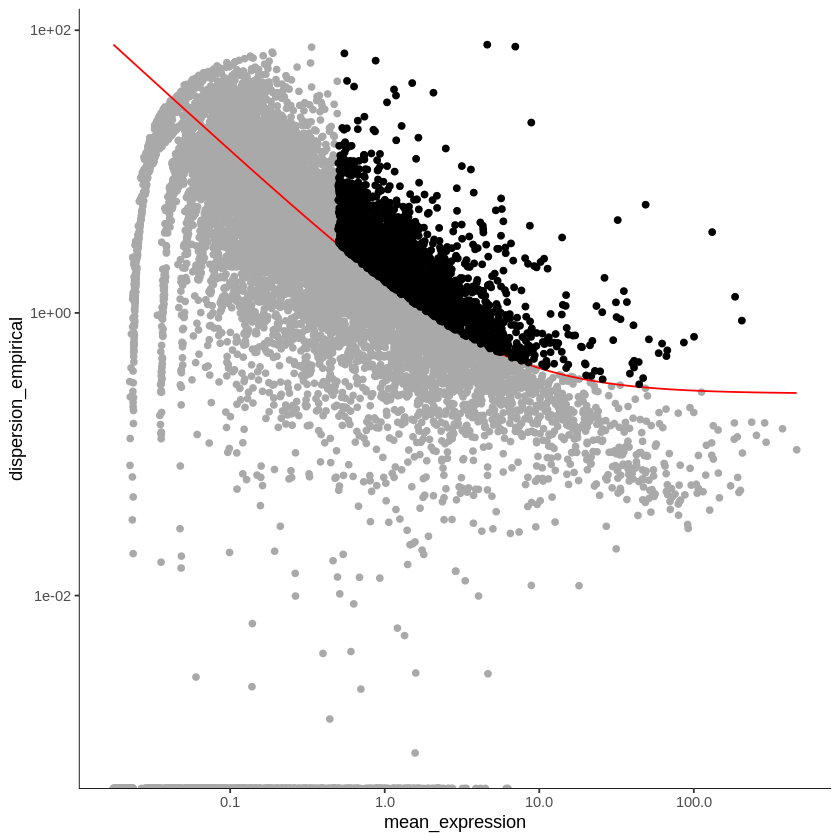

In [24]:
# Strategy 1：  Ordering based on genes that differ between clusters
if(F){
  diff_test_res <- differentialGeneTest(HSMM_myo[expressed_genes,],
                                      fullModelFormulaStr="~Media")
ordering_genes <- row.names (subset(diff_test_res, qval < 0.01))
}
# Strategy 2：Selecting genes with high dispersion across cells
disp_table <- dispersionTable(HSMM_myo)
ordering_genes <- subset(disp_table, 
                         mean_expression >= 0.5 & 
                           dispersion_empirical >= 1 * dispersion_fit)$gene_id

HSMM_myo <- setOrderingFilter(HSMM_myo, ordering_genes)
plot_ordering_genes(HSMM_myo)

__Trajectory step 2: reduce data dimensionality__

In [25]:
HSMM_myo <- reduceDimension(HSMM_myo, max_components = 2,
    method = 'DDRTree')

__Trajectory step 3: order cells along the trajectory__

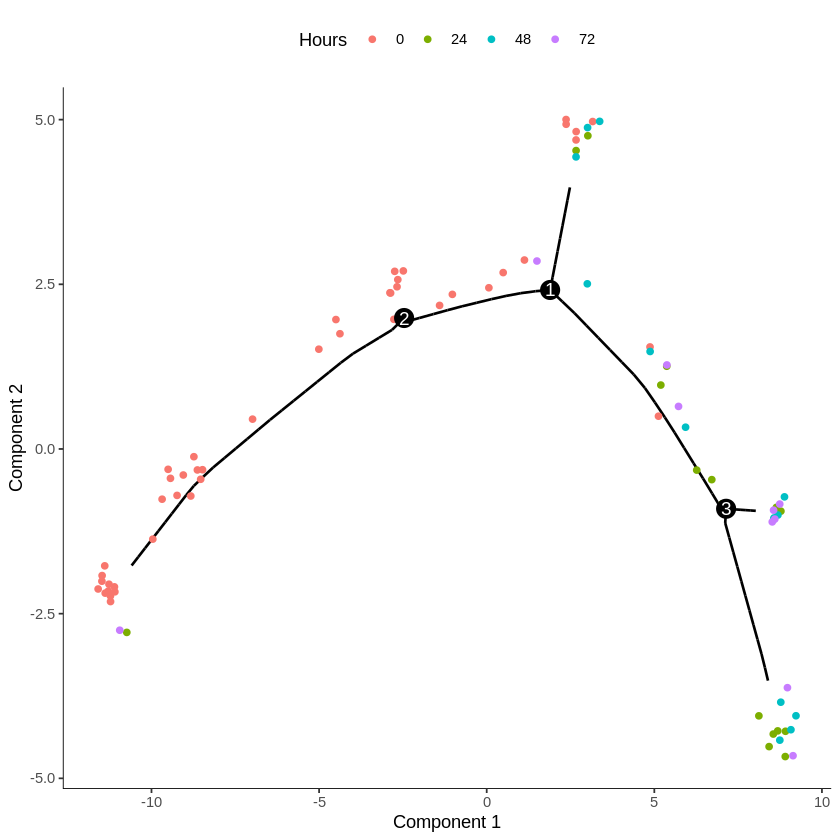

In [26]:

HSMM_myo <- orderCells(HSMM_myo)
plot_cell_trajectory(HSMM_myo, color_by="Hours")

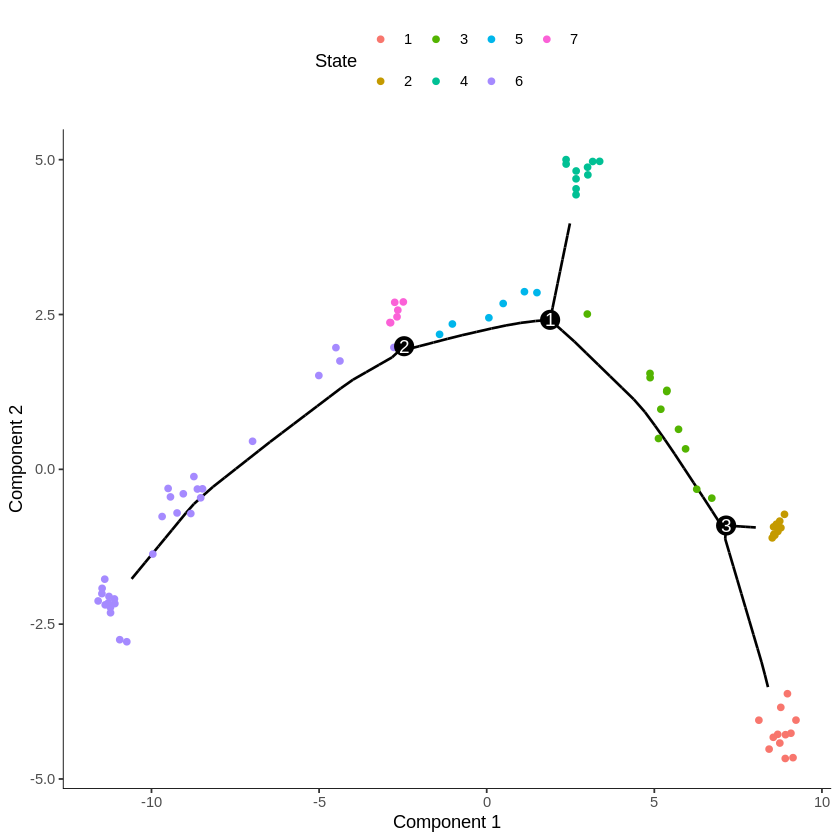

In [27]:
plot_cell_trajectory(HSMM_myo, color_by = "State")

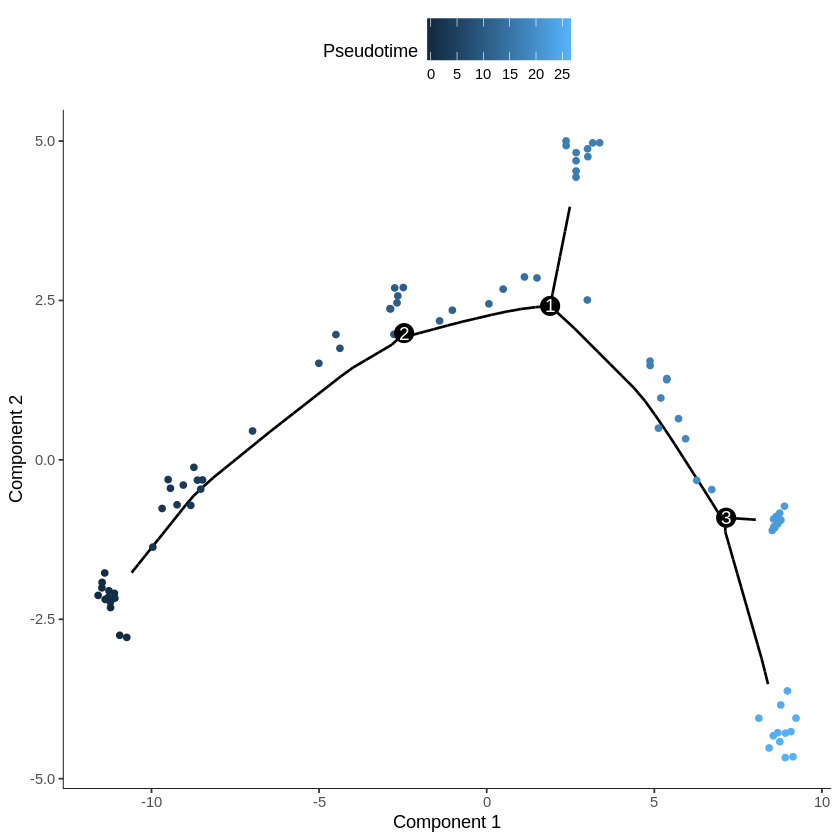

In [28]:
GM_state <- function(cds){
  if (length(unique(pData(cds)$State)) > 1){
    T0_counts <- table(pData(cds)$State, pData(cds)$Hours)[,"0"]
    return(as.numeric(names(T0_counts)[which
          (T0_counts == max(T0_counts))]))
  } else {
    return (1)
  }
}
HSMM_myo <- orderCells(HSMM_myo, root_state = GM_state(HSMM_myo))
plot_cell_trajectory(HSMM_myo, color_by = "Pseudotime")

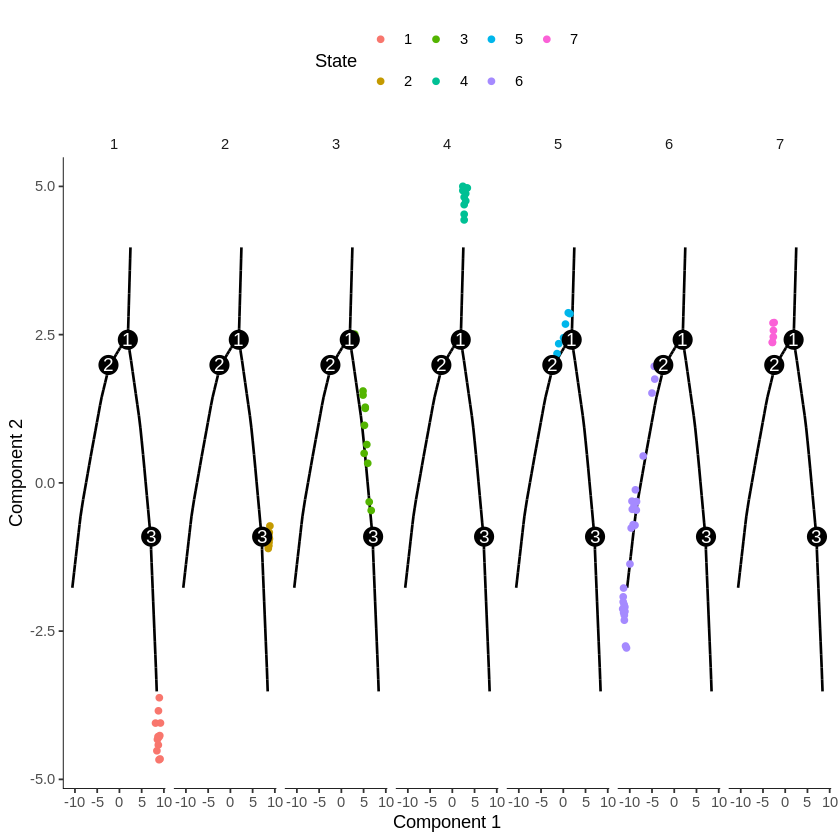

In [29]:
plot_cell_trajectory(HSMM_myo, color_by = "State") +
    facet_wrap(~State, nrow = 1)